Exam 14th of June 2023, 8.00–13.00 for the course 1MS041 (Introduction to Data Science / Introduktion till dataanalys)

1.1 Instructions:
1. Complete the problems by following instructions.
2. When done, submit this file with your solutions saved, following the instruction sheet.
   This exam has 3 problems for a total of 40 points, to pass you need 20 points.

1.2 Some general hints and information:
• Try to answer all questions even if you are uncertain.
• Comment your code, so that if you get the wrong answer I can understand how you thought —
  this can give you some points even though the code does not run.
• Follow the instruction sheet rigorously.
• This exam is partially autograded, but your code and your free text answers are manually graded anonymously.
• If there are any questions, please ask the exam guards, they will escalate it to me if necessary.
• I (Benny) will visit the exam room at around 10:30 to see if there are any questions.

1.3 Tips for free text answers:
• Be VERY clear with your reasoning, there should be zero ambiguity in what you are referring to.
• If you want to include math, you can write LaTeX in the Markdown cells, for instance
  $f(x)=x^2$ will be rendered as $f(x)=x^2$ and $$f(x)=x^2$$ will become an equation line, as follows:

$$f(x)=x^2$$

Another example is:

$$f_{Y \mid X}(y,x) = P(Y=y \mid X=x) = \exp(\alpha \cdot x + \beta)$$

1.4 Finally some rules:
• You may not communicate with others during the exam, for example:
  – You cannot ask for help in StackOverflow or other such help forums during the Exam.
  – You may not communicate with AI’s, for instance ChatGPT.
  – Your on-line and off-line activity is being monitored according to the examination rules.

1.5 Good luck!


# Insert your anonymous exam ID as a string in the variable below
examID = "XXX"


# 1.6 Exam vB, PROBLEM 1  
Maximum Points = 14

A courier company operates a fleet of delivery trucks that make deliveries to different parts of the city.  
The trucks are equipped with GPS tracking devices that record the location of each truck at regular intervals.  
The locations are divided into three regions: downtown, the suburbs, and the countryside.

The following table shows the probabilities of a truck transitioning between these regions at each time step:

| Current region | Probability to downtown | Probability to suburbs | Probability to countryside |
|----------------|--------------------------|--------------------------|-----------------------------|
| Downtown       | 0.3                      | 0.7                      | 0                           |
| Suburbs        | 0.2                      | 0.5                      | 0.3                         |
| Countryside    | 0                        | 0.5                      | 0.5                         |


1. If a truck is currently in the downtown, what is the probability that it will be in the countryside region after 10 time steps? [2p]

2. If a truck is currently in the downtown, what is the probability that it will be in the countryside region the first time after three time steps or more? [2p]

3. Is this Markov chain irreducible? Explain your answer. [3p]

4. What is the stationary distribution? [3p]

5. Advanced question: What is the expected number of steps it takes starting from the Downtown region to first reach the Countryside region and then returning to Downtown.  
   Hint: to get within 1 decimal point, it is enough to compute the probabilities for hitting times below 120.  
   Motivate your answer in detail [4p].  
   You could also solve this question by simulation, but this gives you a maximum of [2p].


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from scipy import optimize
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    confusion_matrix,
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


A courier company operates a fleet of delivery trucks that make deliveries to different parts of the city.  
The trucks are equipped with GPS tracking devices that record the location of each truck at regular intervals.  
The locations are divided into three regions: downtown, the suburbs, and the countryside.

The following table shows the probabilities of a truck transitioning between these regions at each time step:

| Current region | Probability to downtown | Probability to suburbs | Probability to countryside |
|----------------|--------------------------|--------------------------|-----------------------------|
| Downtown       | 0.3                      | 0.7                      | 0                           |
| Suburbs        | 0.2                      | 0.5                      | 0.3                         |
| Countryside    | 0                        | 0.5                      | 0.5                         |


1. If a truck is currently in the downtown, what is the probability that it will be in the countryside region after 10 time steps? [2p]

In [35]:
# Part 1
# Fill in the answer to part 1 below

P = np.array([[0.3, 0.7, 0], [0.2, 0.5, 0.3], [0, 0.5, 0.5]])

P10 = np.linalg.matrix_power(P, 10)

probability = P10[0, 2].round(3)

problem1_p1 = probability

print(f"The answer is simply {probability}")

The answer is simply 0.318


-----
2. If a truck is currently in the downtown, what is the probability that it will be in the countryside region the first time after three time steps or more? [2p]

-----

In [36]:
# Part 2
# Fill in the answer to part 2 below
problem1_p2 = 0.79


-----
3. Is this Markov chain irreducible? Explain your answer. [3p]

-----

In [37]:
# Part 3
# Fill in the answer to part 3 below as a boolean
problem1_irreducible = True


-----
4. What is the stationary distribution? [3p]

-----

In [38]:
# Part 4
# Fill in the answer to part 4 below
# the answer should be a numpy array of length 3
# make sure that the entries sums to 1!

# This is a function that calculates the stationary distribution:
# This stationary distribution fiunction could also work, just not always the same and correct way:
def stationary_distribution(P):
    """
    Computes the stationary distribution of a Markov chain
    by finding the eigenvector corresponding to eigenvalue 1.
    """
    eigenvalues, eigenvectors = np.linalg.eig(P.T)
    
    # Find the eigenvector associated with eigenvalue 1
    idx = np.argmin(np.abs(eigenvalues - 1))
    vec = np.real(eigenvectors[:, idx])
    
    # Normalize to sum to 1
    stationary = vec / np.sum(vec)
    return stationary

P = np.array([[0.3, 0.7, 0], [0.2, 0.5, 0.3], [0, 0.5, 0.5]])
stationary = stationary_distribution(P)

print(f"This is the stationary distribution of P: \n {stationary}")

problem1_stationary = stationary


This is the stationary distribution of P: 
 [0.15151515 0.53030303 0.31818182]


-----
5. Advanced question: What is the expected number of steps it takes starting from the Downtown region to first reach the Countryside region and then returning to Downtown.  
   Hint: to get within 1 decimal point, it is enough to compute the probabilities for hitting times below 120.  
   Motivate your answer in detail [4p].  
   You could also solve this question by simulation, but this gives you a maximum of [2p].
-----

In [39]:
# This is the function that simply calculates the Expected number of steps it takes:


import numpy as np

def expected_hitting_time(P, target_states, start_state=None, start_dist=None):
    """
    Compute expected hitting times to a given set of target states in a finite Markov chain.

    Parameters
    ----------
    P : np.ndarray, shape (n, n)
        Transition matrix of the Markov chain.
    target_states : iterable of int
        Indices of the target states.
    start_state : int, optional
        If provided, return the expected hitting time starting from this state.
    start_dist : array-like, shape (n,), optional
        If provided, return the expected hitting time under this initial distribution.

    Returns
    -------
    float or np.ndarray
        - If start_state is given: expected hitting time from that state.
        - If start_dist is given: expected hitting time under that distribution.
        - If neither is given: array h of length n with expected hitting times
          from all states (targets have value 0).

    Notes
    -----
    This solves the linear system

        (I - Q) h_S = 1

    where Q is the submatrix of P restricted to non-target states,
    and 1 is a vector of ones. Assumes that the target set is hit
    with probability 1 from the relevant starting states.
    """
    P = np.asarray(P, dtype=float)
    n = P.shape[0]

    target_states = np.array(sorted(set(target_states)), dtype=int)
    all_states = np.arange(n, dtype=int)

    # Non-target states S
    non_target_states = np.array([s for s in all_states if s not in target_states], dtype=int)

    # If all states are targets, hitting time is identically zero
    if non_target_states.size == 0:
        h = np.zeros(n, dtype=float)
        if start_state is not None:
            return float(h[start_state])
        if start_dist is not None:
            start_dist = np.asarray(start_dist, dtype=float)
            return float(start_dist @ h)
        return h

    # Build Q and solve (I - Q) h_S = 1
    Q = P[np.ix_(non_target_states, non_target_states)]
    I = np.eye(Q.shape[0])
    ones = np.ones(Q.shape[0])

    # Solve for h_S
    h_S = np.linalg.solve(I - Q, ones)

    # Put back into full vector h of length n
    h = np.zeros(n, dtype=float)
    h[target_states] = 0.0
    for idx, s in enumerate(non_target_states):
        h[s] = h_S[idx]

    # Return according to user request
    if (start_state is not None) and (start_dist is not None):
        raise ValueError("Provide either start_state or start_dist, not both.")

    if start_state is not None:
        return float(h[start_state])

    if start_dist is not None:
        start_dist = np.asarray(start_dist, dtype=float)
        if start_dist.shape[0] != n:
            raise ValueError("start_dist must have length equal to number of states.")
        return float(start_dist @ h)

    return h


In [40]:
# Part 5
# Fill in the answer to part 5 below
# That is, the expected number of steps

# This is from Downtown to Countryside first to reach
ET_Downtown_to_Countryside = expected_hitting_time(P, target_states=[2], start_state=0)

print(f"This is ET for Downtown to Countryside: {ET_Downtown_to_Countryside}")  

# This is from countryside back to Downtown
ET_Countryside_to_Downtown = expected_hitting_time(P, target_states=[0], start_state=2)

print(f"This is ET for Countryside to Downtown: {ET_Countryside_to_Downtown}")

ET_Total = (ET_Downtown_to_Countryside + ET_Countryside_to_Downtown)

ET_Total_Rounded = round(ET_Total, 3)

print(f"This is the total number of steps from Downtown -> Countryside -> Back to Downtown: {ET_Total_Rounded}")

problem1_ET = ET_Total_Rounded


This is ET for Downtown to Countryside: 5.714285714285714
This is ET for Countryside to Downtown: 10.0
This is the total number of steps from Downtown -> Countryside -> Back to Downtown: 15.714


-----

# NEW SECTION BEGINS

-----

# 1.9 Exam vB, PROBLEM 2  
Maximum Points = 13

You are given a “Data Science Salaries” dataset found in data/salaries.csv, which contains employment information of data scientists up to 2023 and the salary obtained. Your task is to train a linear regression model to predict the salary of a data scientist based on the employment information.

To evaluate your model, you will split the dataset into a training set and a testing set. You will use the training set to train your model, and the testing set to evaluate its performance.

Experience level: 0 = Entry Level, 1 = Mid Level, 2 = Senior Level, 3 = Executive Level.  

Employment type: 0 = Part Time, 1 = Full Time, 2 = Contractor, 3 = Freelancer

1. Load the data into a pandas dataframe problem2_df. Based on the column names, figure out what are the features and the target and fill in the answer in the correct cell below. [1p]

2. Split the data into train and test. [1p]

3. Train the model. [1p]

4. Come up with a reasonable metric and compute it. Provide plots that show the performance of the model. Reason about the performance. [4p]

5. Predict the 2023 salary of a data scientist that works full time (1) at mid employment level (1) with 0 remote ratio. Then, looking at the output of problem2_model.coef_, which are the coefficients of the linear model, would a higher remote ratio result in a higher predicted salary or vice versa? [3p]

6. Advanced question: On the test set, plot the empirical distribution function of the residual with confidence bands (i.e. using the DKW inequality and 95% confidence). What does the confidence band tell us? What can the confidence band be used for? [3p]


-----
# 1.9 Exam vB, PROBLEM 2  
Maximum Points = 13

You are given a “Data Science Salaries” dataset found in data/salaries.csv, which contains employment information of data scientists up to 2023 and the salary obtained. Your task is to train a linear regression model to predict the salary of a data scientist based on the employment information.

To evaluate your model, you will split the dataset into a training set and a testing set. You will use the training set to train your model, and the testing set to evaluate its performance.

Experience level: 0 = Entry Level, 1 = Mid Level, 2 = Senior Level, 3 = Executive Level.  

Employment type: 0 = Part Time, 1 = Full Time, 2 = Contractor, 3 = Freelancer

1. Load the data into a pandas dataframe problem2_df. Based on the column names, figure out what are the features and the target and fill in the answer in the correct cell below. [1p]

-----

In [41]:
# Part 1
# Let problem2_df be the pandas dataframe that contains the data from the file
# data/abalone.csv
problem2_df = pd.read_csv("data/salaries.csv")

# problem2_df.head(5)

print(problem2_df.columns.values)

['work_year' 'experience_level' 'employment_type' 'salary_in_usd'
 'remote_ratio']


In [42]:
# Part 1
# Fill in the features as a list of strings of the names of the columns
problem2_features = ["work_year", "experience_level", "employment_type", "remote_ratio"]

# Fill in the target as a string with the correct column name
problem2_target = "salary_in_usd"


-----
2. Split the data into train and test. [1p]

-----

In [43]:
# Part 2
# Split the data into train and test using train_test_split
# keep the train size as 0.8 and use random_state=42
X = problem2_df[problem2_features]
y = problem2_df[problem2_target]
problem2_X_train, problem2_X_test, problem2_y_train, problem2_y_test = train_test_split(
    X, y, train_size=0.8, random_state=42
)


-----
3. Train the model. [1p]

-----

In [44]:
# Part 3
# Include the necessary imports
# Initialize your linear regression model
problem2_model = LinearRegression()

# Train your model on the training data
problem2_model.fit(problem2_X_train, problem2_y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


-----
4. Come up with a reasonable metric and compute it. Provide plots that show the performance of the model. Reason about the performance. [4p]

-----

The MSE score is: 3161126689.5785775


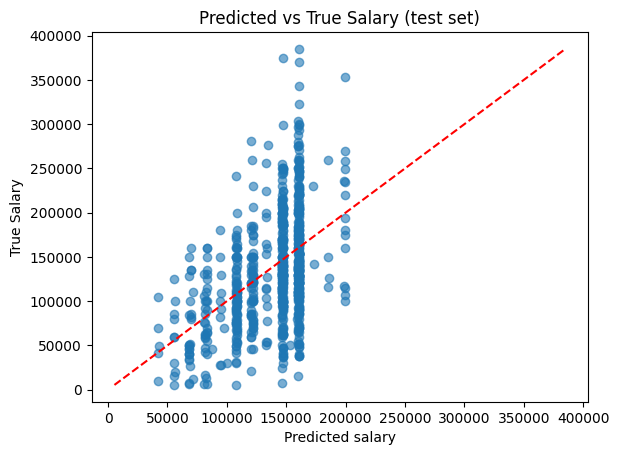

In [45]:
# Part 4
# Write the code to diagnose your model
y_true = problem2_y_test
y_pred = problem2_model.predict(problem2_X_test)

MSE = mean_squared_error(y_true, y_pred)

print(f"The MSE score is: {MSE}")

# Plotting

plt.scatter(y_pred, y_true, alpha=0.6)
plt.xlabel("Predicted salary")
plt.ylabel("True Salary")
plt.title("Predicted vs True Salary (test set)")
# Identity line (perfect predictions)
min_val = min(np.min(y_pred), np.min(y_true))
max_val = max(np.max(y_pred), np.max(y_true))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label="Ideal: y = ŷ")

plt.show()

### Reasoning about the model performance

The predicted-versus-true salary plot shows that the model captures the overall increasing relationship between predicted and actual salaries, as most points follow the general direction of the identity line. This indicates that the model has learned relevant patterns in the data.

However, there is substantial dispersion around the identity line, especially for mid- to high-salary values. For a given predicted salary, the true salaries vary widely, which suggests a high level of prediction uncertainty and variance in the errors.

The plot also indicates regression toward the mean: lower salaries tend to be overestimated, while higher salaries are often underestimated. This suggests that the model struggles to accurately predict extreme salary values, possibly due to limited model complexity, missing explanatory variables, or noise in the data.

Overall, the model demonstrates moderate predictive performance. It captures the general trend in the data but lacks precision for individual predictions, particularly at the extremes of the salary range.


-----
5. Predict the 2023 salary of a data scientist that works full time (1) at mid employment level (1) with 0 remote ratio. Then, looking at the output of problem2_model.coef_, which are the coefficients of the linear model, would a higher remote ratio result in a higher predicted salary or vice versa? [3p]

-----

In [46]:
# Part 5
# Put the code for part 5 below this line
# print(problem2_df.columns.values)

new_df = pd.DataFrame({
    "work_year": [2023],
    "experience_level": [1],
    "employment_type": [1],
    "remote_ratio": [0]
})

# We put [0] here because we get a list of the salary when we actually just want the value
problem2_predicted_salary = problem2_model.predict(new_df)[0]

remote_ratio_coef = problem2_model.coef_[3]
print("Predicted salary:", problem2_predicted_salary)

print(f"This is the remote ratio coefficient from the model: {remote_ratio_coef}")

# Interpretation comment:
# If remote_ratio_coef > 0 => higher remote_ratio gives higher predicted salary.
# If remote_ratio_coef < 0 => higher remote_ratio gives lower predicted salary.

Predicted salary: 121940.38437091932
This is the remote ratio coefficient from the model: -13.029475233542966


-----
6. Advanced question: On the test set, plot the empirical distribution function of the residual with confidence bands (i.e. using the DKW inequality and 95% confidence). What does the confidence band tell us? What can the confidence band be used for? [3p]
-----

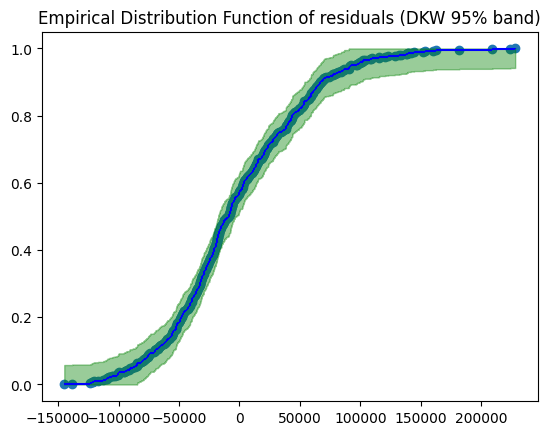

In [47]:
# Part 6
# Put the code for part 6 below this line
# THIS IS THE OPTIMAL WAY TO PLOT THE EMPIRICAL DISTRIBUTION FUNCTION WITH 95% CONFIDENCE BANDS:

# from Utils import makeEDF,plotEDF
from Utils import makeEDF, plotEDF

y_pred = problem2_model.predict(problem2_X_test)

y_true = problem2_y_test

residuals = (y_true - y_pred).to_numpy()

# 4) Build EDF using Utils.py
edf_residuals = makeEDF(residuals)

# 5) Plot EDF with DKW confidence band (95% confidence => alpha=0.95)
plotEDF(
    edf_residuals,
    confidence_band=True,
    alpha=0.95,
    title="Empirical Distribution Function of residuals (DKW 95% band)"
)



# 1.13 Exam vB, PROBLEM 3  
Maximum Points = 13

For this problem we have the Diabetes dataset, I have encoded the categorical features
using One-Hot encoding, namely the following 
['smoking_No Info', 'smoking_current', 'smoking_ever', 'smoking_former', 
 'smoking_never', 'smoking_not current', 'sex_Female', 'sex_Male', 'sex_Other'].

Treating this as a classification problem, we will train a logistic regression model to predict whether
the patient has diabetes or not. Then the task is to evaluate the model and using it to make some
conclusions.

Instructions:

1. Load the file data/diabetes.csv into the pandas dataframe problem3_df.  
   Decide what should be features and target, give motivations for your choices. [3p]

2. Create the problem3_X and the problem3_y as numpy arrays with problem3_X being the
   features and problem3_y being the target.  
   Do the standard train-test split with 80% training data and 20% testing data.  
   Store these in the variables defined in the cells. [2p]

3. Now train a Logistic regression model on the training data using  
   sklearn.linear_model.LogisticRegression.  
   Hint: If you use many of the One-Hot encoded features you will probably see a warning about  
   max iterations reached. Adjust the hyperparameter C (this is the penalization) when you create 
   your LogisticRegression. [2p]

4. Evaluation: Calculate the precision and recall for class 0 and 1 with 95% confidence bounds.  
   Explain their meaning. [3p]

5. Advanced question: Come up with a way to define the one-hot encoded feature that is most
   important for the prediction. Motivate your choice. [3p]


1.14 Part 1  
Double click this cell to enter edit mode and write your answer for part 1 below this line.

What features are reasonable?  
In regards to how much data we have, how many features do you think we should aim for?  
What other features would you like to have used but was not collected?  

Discussion


-----
# 1.13 Exam vB, PROBLEM 3  
Maximum Points = 13

For this problem we have the Diabetes dataset, I have encoded the categorical features
using One-Hot encoding, namely the following 
['smoking_No Info', 'smoking_current', 'smoking_ever', 'smoking_former', 
 'smoking_never', 'smoking_not current', 'sex_Female', 'sex_Male', 'sex_Other'].

Treating this as a classification problem, we will train a logistic regression model to predict whether
the patient has diabetes or not. Then the task is to evaluate the model and using it to make some
conclusions.

Instructions:

1. Load the file data/diabetes.csv into the pandas dataframe problem3_df.  
   Decide what should be features and target, give motivations for your choices. [3p]

-----

In [48]:
# Part 1
# Let problem3_df be the pandas dataframe that contains the data from the file
# data/visits_clean.csv
problem3_df = pd.read_csv("data/diabetes.csv")

print(problem3_df.columns.values)
print(problem3_df.head(5))



['smoking_No Info' 'smoking_current' 'smoking_ever' 'smoking_former'
 'smoking_never' 'smoking_not current' 'sex_Female' 'sex_Male' 'sex_Other'
 'age' 'hypertension' 'heart_disease' 'bmi' 'HbA1c_level'
 'blood_glucose_level' 'diabetes']
   smoking_No Info  smoking_current  smoking_ever  smoking_former  \
0                0                0             0               0   
1                1                0             0               0   
2                0                0             0               0   
3                0                1             0               0   
4                0                1             0               0   

   smoking_never  smoking_not current  sex_Female  sex_Male  sex_Other   age  \
0              1                    0           1         0          0  80.0   
1              0                    0           1         0          0  54.0   
2              1                    0           0         1          0  28.0   
3              0            

In [49]:
# Part 1
# Fill in the features as a list of strings of the names of the columns
problem3_features = [ 
    "smoking_No Info",
    "smoking_current",
    "smoking_ever",
    "smoking_former",
    "smoking_never",
    "smoking_not current",
    "sex_Female",
    "sex_Male",
    "sex_Other",
    "age",
    "hypertension",
    "heart_disease",
    "bmi",
    "HbA1c_level",
    "blood_glucose_level"
]

# Fill in the target as a string with the correct column name
problem3_target = "diabetes"


-----
2. Create the problem3_X and the problem3_y as numpy arrays with problem3_X being the
   features and problem3_y being the target.  
   Do the standard train-test split with 80% training data and 20% testing data.  
   Store these in the variables defined in the cells. [2p]

-----

In [50]:
# Part 2
# Fill in your X and y below
problem3_X = problem3_df[problem3_features].to_numpy()
problem3_y = problem3_df[problem3_target].to_numpy()

# Split the data into train and test using train_test_split
# keep the train size as 0.8 and use random_state=42
problem3_X_train, problem3_X_test, problem3_y_train, problem3_y_test = train_test_split(
    problem3_X, problem3_y, train_size=0.8, random_state=42
)


-----
3. Now train a Logistic regression model on the training data using  
   sklearn.linear_model.LogisticRegression.  
   Hint: If you use many of the One-Hot encoded features you will probably see a warning about  
   max iterations reached. Adjust the hyperparameter C (this is the penalization) when you create 
   your LogisticRegression. [2p]

-----

In [51]:
# Part 3
# Initialize your LogisticRegression model
problem3_model = LogisticRegression(
    C=0.01,          # stronger regularization
    max_iter=1000    # allow more iterations
)

# Fit your initialized model on the training data
problem3_model.fit(problem3_X_train, problem3_y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.01
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


-----
4. Evaluation: Calculate the precision and recall for class 0 and 1 with 95% confidence bounds.  
   Explain their meaning. [3p]

-----

In [52]:
# Give the answer for each of the following quantities in the form of a tuple
# Example:
# if the precision for class 0 is between 0.31 and 0.69, write:
# problem3_precision_0 = (0.31, 0.69)

# We can only have values between 0 and 1, so a = 0, and b=1

a,b = 0,1
alpha = 0.05 # For 95% confidence interval

def hoeffding(p, n):
    epsilon = (b-a)*np.sqrt(np.log(alpha/2) / (-2*n))
    lower = max(0, p - epsilon)
    upper = min(1, p + epsilon)
    return (lower, upper)

# To be able to calculate the precision and recall we need to extrace the TP, TN... variables.
# This can be done by using a covariance matrix:
y_true = problem3_y_test
y_pred = problem3_model.predict(problem3_X_test)


# This is solution 1 using covariance_matrix: 
tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0,1]).ravel()
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")

prec0 = tn / (tn + fn)
n_prec0 = tn+fn

prec1 = tp / (tp + fp)
n_prec1 = tp+fp

rec0 = tn / (tn+fp)
n_rec0 = tn+fp

rec1 = tp / (tp+fn)
n_rec1 = tp+fn

problem3_precision_0 = hoeffding(prec0, n_prec0)
problem3_recall_0 = hoeffding(rec0, n_rec0)
problem3_precision_1 = hoeffding(prec1, n_prec1)
problem3_recall_1 = hoeffding(rec1, n_rec1)

print(f"This is the intervals: \nPrecision 0: {problem3_precision_0} \nRecall 0: {problem3_recall_0} \nPrecision 1: {problem3_precision_1} \nRecall 1: {problem3_recall_1}")






# This is the other way to simply use precision and recall score functions:
from sklearn.metrics import precision_score, recall_score

precision0 = precision_score(y_true, y_pred, pos_label=0)
precision1 = precision_score(y_true, y_pred, pos_label=1)

recall0 = recall_score(y_true, y_pred, pos_label=0)
recall1 = recall_score(y_true, y_pred, pos_label=1)

precision0_n = np.sum(y_pred == 0)
precision1_n = np.sum(y_pred == 1)

recall0_n = np.sum(y_true == 0)
recall1_n = np.sum(y_true == 1)


problem3_precision_0_score = hoeffding(precision0, precision0_n)
problem3_precision_1_score = hoeffding(precision1, precision1_n)

problem3_recall_0_score = hoeffding(recall0, recall0_n)
problem3_recall_1_score = hoeffding(recall1, recall1_n)

print("\n \n")
print(f"This is the intervals: \nPrecision 0: {problem3_precision_0_score} \nRecall 0: {problem3_recall_0_score} \nPrecision 1: {problem3_precision_1_score} \nRecall 1: {problem3_recall_1_score}")



TN: 18151, FP: 141, FN: 675, TP: 1033
This is the intervals: 
Precision 0: (np.float64(0.9542471997106146), np.float64(0.9740434621400176)) 
Recall 0: (np.float64(0.982250141819705), 1) 
Precision 1: (np.float64(0.8402610218418121), np.float64(0.9195345488566546)) 
Recall 1: (np.float64(0.5719393673567759), np.float64(0.6376625061795238))

 

This is the intervals: 
Precision 0: (np.float64(0.9542471997106146), np.float64(0.9740434621400176)) 
Recall 0: (np.float64(0.982250141819705), 1) 
Precision 1: (np.float64(0.8402610218418121), np.float64(0.9195345488566546)) 
Recall 1: (np.float64(0.5719393673567759), np.float64(0.6376625061795238))


1.16 Part 5  
Double click this cell to enter edit mode and write your answer for part 5 below this line.


-----
5. Advanced question: Come up with a way to define the one-hot encoded feature that is most
   important for the prediction. Motivate your choice. [3p]
-----

In [53]:
one_hot_encoded = [
    "smoking_No Info",
    "smoking_current",
    "smoking_ever",
    "smoking_former",
    "smoking_never",
    "smoking_not current",
    "sex_Female",
    "sex_Male",
    "sex_Other"
]

best_feature = None
best_value = 0

# coefficients in the same order as problem3_features
coefs = problem3_model.coef_[0]

for i in range(len(problem3_features)):
    feature_name = problem3_features[i]
    
    # only look at one-hot encoded features
    if feature_name in one_hot_encoded:
        coef_value = coefs[i]
        
        # compare absolute importance
        if abs(coef_value) > abs(best_value):
            best_value = coef_value
            best_feature = feature_name

print("Most important one-hot feature:", best_feature)
print("Coefficient:", best_value)

print("\n")
print(f"This is all of the different coefficients from the model: {coefs}")




# INSTEAD OF DOING ALL OF THE ABOVE WITH THE LOOPS, ONE COULD ALSO SIMPLY PRINT OUT ALL OF THE COEFFICIENTS
# USING problem3_model.coef_[0], AND THEN COMPARE THEM WITH ALL THE FEATURES, SINCE THE ORDER OF THE 
# FEATURES CORRESPONDS TO THE SAME ORDER FOR THE .coef_

# EX:
# problem3_features = [ 
#     "smoking_No Info",  => coef_[0][0]
#     "smoking_current",  => coef_[0][1]
#     "smoking_ever",     => and so on
#     "smoking_former",
#     "smoking_never",
#     "smoking_not current",
#     "sex_Female",
#     "sex_Male",
#     "sex_Other",
#     "age",
#     "hypertension",
#     "heart_disease",
#     "bmi",
#     "HbA1c_level",
#     "blood_glucose_level"
# ]

Most important one-hot feature: smoking_No Info
Coefficient: -0.4315121358692814


This is all of the different coefficients from the model: [-0.43151214  0.18044164  0.08418541  0.08312254  0.04828899  0.02819233
 -0.11192994  0.14104635 -0.03639764  0.0472686   0.5613713   0.51554534
  0.08766013  2.04550504  0.03257989]
